# 바이트 페어 인코딩(Byte Pair Encoding, BPE)
기계에게 아무리 많은 단어를 학습시켜도 세상의 모든 단어를 알려줄 수는 없는 노릇입니다. 만약 기계가 모르는 단어가 등장하면 그 단어를 단어 집합에 없는 단어란 의미에서 해당 토큰을 UNK(Unknown Token)라고 표현합니다. 기계가 문제를 풀 때 모르는 단어가 등장하면 (사람도 마찬가지지만) 주어진 문제를 푸는 것이 까다로워집니다. 이와 같이 모르는 단어로 인해 문제를 푸는 것이 까다로워지는 상황을 OOV(Out-Of-Vocabulary) 문제라고 합니다.

**서브워드 분리(Subword segmenation) 작업은 하나의 단어는 더 작은 단위의 의미있는 여러 서브워드들(Ex) birthplace = birth + place)의 조합으로 구성된 경우가 많기 때문에, 하나의 단어를 여러 서브워드로 분리해서 단어를 인코딩 및 임베딩하겠다는 의도를 가진 전처리 작업입니다.** 이를 통해 OOV나 희귀 단어, 신조어와 같은 문제를 완화시킬 수 있습니다. 실제로 언어의 특성으로 인해 영어나 한국어는 서브워드 분리를 시도했을 때 어느정도 의미있는 단위로 나누는 것이 가능합니다. 이 책에서는 이런 작업을 하는 토크나이저를 서브워드 토크나이저라고 명명합니다. 여기서는 OOV(Out-Of-Vocabulary) 문제를 완화하는 대표적인 서브워드 분리 알고리즘인 BPE(Byte Pair Encoding) 알고리즘을 소개합니다.

## BPE(Byte Pair Encoding)
BPE(Byte pair encoding) 알고리즘은 1994년에 제안된 데이터 압축 알고리즘입니다. 
하지만 후에 자연어 처리의 서브워드 분리 알고리즘으로 응용되었는데 이에 대해서는 뒤에 언급하도록 하고, 우선 기존의 BPE의 작동 방법에 대해서 이해해보겠습니다.

aaabdaaabac
BPE은 기본적으로 연속적으로 가장 많이 등장한 글자의 쌍을 찾아서 하나의 글자로 병합하는 방식을 수행합니다. 태생이 압축 알고리즘인 만큼, 여기서는 글자 대신 바이트(byte)라는 표현을 사용하겠습니다. 예를 들어 위의 문자열 중 가장 자주 등장하고 있는 바이트의 쌍(byte pair)은 'aa'입니다. 이 'aa'라는 바이트의 쌍을 하나의 바이트인 'Z'로 치환해보겠습니다.

ZabdZabac
Z=aa
위 문자열 중에서 가장 많이 등장하고 있는 바이트의 쌍은 'ab'입니다. 이 'ab'를 'Y'로 치환해봅시다.

ZYdZYac
Y=ab
Z=aa
가장 많이 등장하고 있는 바이트의 쌍은 'ZY'입니다. 이를 'X'로 치환해봅시다.

XdXac
X=ZY
Y=ab
Z=aa
더 이상 병합할 바이트의 쌍은 없으므로 BPE는 위의 결과를 최종 결과로 하여 종료됩니다.

## 자연어 처리에서의 BPE(Byte Pair Encoding)
논문 : https://arxiv.org/pdf/1508.07909.pdf

자연어 처리에서의 BPE는 서브워드 분리(subword segmentation) 알고리즘입니다. 기존에 있던 단어를 분리한다는 의미입니다. BPE을 요약하면, 글자(charcter) 단위에서 점차적으로 단어 집합(vocabulary)을 만들어 내는 Bottom up 방식의 접근을 사용합니다. 우선 훈련 데이터에 있는 단어들을 모든 글자(chracters) 또는 유니코드(unicode) 단위로 단어 집합(vocabulary)를 만들고, 가장 많이 등장하는 유니그램을 하나의 유니그램으로 통합합니다.

BPE을 자연어 처리에 사용한다고 제안한 논문(Sennrich et al. (2016))에서 이미 BPE의 코드를 공개하였다

### 기존의 접근
어떤 훈련 데이터로부터 각 단어들의 빈도수를 카운트했다고 해보겠습니다. 그리고 각 단어와 각 단어의 빈도수가 기록되어져 있는 해당 결과는 임의로 딕셔너리(dictionary)란 이름을 붙였습니다.

 dictionary

 훈련 데이터에 있는 단어와 등장 빈도수
low : 5, lower : 2, newest : 6, widest : 3

이 훈련 데이터에는 'low'란 단어가 5회 등장하였고, 'lower'란 단어는 2회 등장하였으며, 'newest'란 단어는 6회, 'widest'란 단어는 3회 등장하였다는 의미입니다. 그렇다면 딕셔너리로부터 이 훈련 데이터의 단어 집합(vocabulary)을 얻는 것은 간단합니다.

 vocabulary
 
low, lower, newest, widest

단어 집합은 중복을 배제한 단어들의 집합을 의미하므로 기존에 배운 단어 집합의 정의라면, 이 훈련 데이터의 단어 집합에는 'low', 'lower', 'newest', 'widest'라는 4개의 단어가 존재합니다. 그리고 이 경우 테스트 과정에서 'lowest'란 단어가 등장한다면 기계는 이 단어를 학습한 적이 없으므로 해당 단어에 대해서 제대로 대응하지 못하는 OOV 문제가 발생합니다. 그렇다면 BPE를 적용한다면 어떨까요?

### BPE 알고리즘을 사용한 경우

위의 딕셔너리에 BPE를 적용해봅시다. 우선 딕셔너리의 모든 단어들을 글자(chracter) 단위로 분리합니다. 이 경우 딕셔너리는 아래와 같습니다. 이제부터 딕셔너리는 자신 또한 업데이트되며 앞으로 단어 집합을 업데이트하기 위해 지속적으로 참고되는 참고 자료의 역할을 합니다.

 dictionary

l o w : 5,  l o w e r : 2,  n e w e s t : 6,  w i d e s t : 3
딕셔너리를 참고로 한 초기 단어 집합(vocabulary)을 아래와 같습니다. 간단히 말해 초기 구성은 글자 단위로 분리된 상태입니다.

 vocabulary

l, o, w, e, r, n, s, t, i, d
BPE의 특징은 알고리즘의 동작을 몇 회 반복(iteration)할 것인지를 사용자가 정한다는 점입니다. 여기서는 총 10회를 수행한다고 가정합니다. 다시 말해 가장 빈도수가 높은 유니그램의 쌍을 하나의 유니그램으로 통합하는 과정을 총 10회 반복합니다. 위의 딕셔너리에 따르면 빈도수가 현재 가장 높은 유니그램의 쌍은 (e, s)입니다.

1회 - 딕셔너리를 참고로 하였을 때 빈도수가 9로 가장 높은 (e, s)의 쌍을 es로 통합합니다.

 dictionary update!

l o w : 5,
l o w e r : 2,
n e w es t : 6,
w i d es t : 3

 vocabulary update!

l, o, w, e, r, n, s, t, i, d, es
2회 - 빈도수가 9로 가장 높은 (es, t)의 쌍을 est로 통합합니다.

 dictionary update!

l o w : 5,
l o w e r : 2,
n e w est : 6,
w i d est : 3

 vocabulary update!

l, o, w, e, r, n, s, t, i, d, es, est
3회 - 빈도수가 7로 가장 높은 (l, o)의 쌍을 lo로 통합합니다.

 dictionary update!

lo w : 5,
lo w e r : 2,
n e w est : 6,
w i d est : 3

 vocabulary update!

l, o, w, e, r, n, s, t, i, d, es, est, lo

이와 같은 방식으로 총 10회 반복하였을 때 얻은 딕셔너리와 단어 집합은 아래와 같습니다.

 dictionary update!

low : 5,
low e r : 2,
newest : 6,
widest : 3

 vocabulary update!

l, o, w, e, r, n, s, t, i, d, es, est, lo, low, ne, new, newest, wi, wid, widest

이 경우 테스트 과정에서 'lowest'란 단어가 등장한다면, 기존에는 OOV에 해당되는 단어가 되었겠지만 BPE 알고리즘을 사용한 위의 단어 집합에서는 더 이상 'lowest'는 OOV가 아닙니다. 기계는 우선 'lowest'를 전부 글자 단위로 분할합니다. 즉, 'l, o, w, e, s, t'가 됩니다. 그리고 기계는 위의 단어 집합을 참고로 하여 'low'와 'est'를 찾아냅니다. 즉, 'lowest'를 기계는 'low'와 'est' 두 단어로 인코딩합니다. 그리고 이 두 단어는 둘 다 단어 집합에 있는 단어이므로 OOV가 아닙니다.

이 동작 과정을 그림으로 표현한다면 다음과 같습니다.

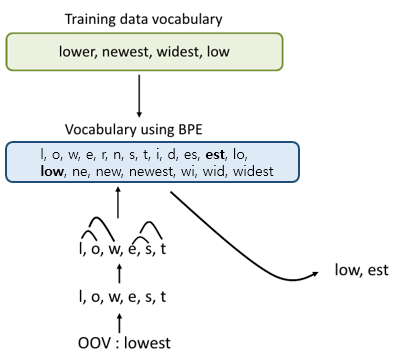

In [8]:
import re, collections
from IPython.display import display,Markdown,Latex

num_merger=10
dictionary = {'l o w </w>' : 5,
         'l o w e r </w>' : 2,
         'n e w e s t </w>':6,
         'w i d e s t </w>':3
         }

def get_stats(dictionary):
    pairs=collections.defaultdict(int)
    for word,freq in dictionary.items():
        symbol=word.split()
        for i in range(len(symbol)-1):
            pairs[symbol[i],symbol[i+1]]+=freq
        print('현재 pair들의 빈도수 :', dict(pairs))
        return pairs

def merger_dic(pair,v_in):
    v_out={}
    bigram=re.escape(''.join(pair))  #escape(pattern):escape()는 패턴을 입력 받으면 특수문자들에 이스케이프(백슬래쉬) 처리를 한 다음 반환합니다.
    p=re.compile(r'(?<!\S)'+bigram+r'(?!\S)')

    for word in v_in:
        w_out=p.sub(''.join(pair),word)
        v_out[w_out]=v_in[word]
    return v_out

bpe={}
bpe_reverse={}

for i in range(num_merger):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs=get_stats(dictionary)
    best=max(pairs,key=pairs.get)
    dictionary=merger_dic(best,dictionary)
    bpe[best]=i
    bpe_reverse[best[0]+best[1]]=best
    
    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

print('======================================')
print(bpe)

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('l', 'o'): 5, ('o', 'w'): 5, ('w', '</w>'): 5}
new merge: ('l', 'o')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w e s t </w>': 6, 'w i d e s t </w>': 3}
{('l', 'o'): 9}


In [19]:
#OOV에 대처하기
def get_pair(word):
    """Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """    
    pairs=set()
    prev_char=word[0]
    for char in word[:1]:
        pairs.add((prev_char,char))
        prev_char=char
    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""
    word=tuple(orig)+('</w>',)
    display(Markdown('__word split into charactors:__<tt>{}</tt>'.format(word)))

    pairs=get_pair(word)
    if not pairs:
        return orig
    iteration=0
    while True:
        iteration+=1
        display(Markdown('__Iteration__{}:'.format(iteration)))
        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))


        if bigram not in bpe:
            display(Markdown('__Candidate not inBPE merger,algorithm stops.__'))
            break
        first,second=bigram
        new_word=[]
        i=0
        while i<len(word):
            try:
                j=word.index(first,i)
                new_word.extend(word[i:j])
                i=j
            except:
                new_word.extend(word[i:])
                break

        if word[i]==first and i<len(word)-1 and word[i+1]==second:
            new_word.append(first+second)
            i+=2
        else:
            new_word.append(word[i])
            i+=1
        new_word=tulpe(new_word)
        word=new_word
        print("word after merging: {}".format(word))
        if len(word):
            break
        else:
            pairs=get_pair

    if word[-1]=='</w>':
        word=word[:-1]
    elif wordp[-1].endswith('</w>'):
        word=word[:1]+(word[-1].replace('</w>',''),)

    return word

encode("loki")
encode("lowest")
encode("lowing")
encode("highing")


__word split into charactors:__<tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration__1:

bigrams in the word: {('l', 'l')}
candidate for merging: ('l', 'l')


__Candidate not inBPE merger,algorithm stops.__

__word split into charactors:__<tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration__1:

bigrams in the word: {('l', 'l')}
candidate for merging: ('l', 'l')


__Candidate not inBPE merger,algorithm stops.__

__word split into charactors:__<tt>('l', 'o', 'w', 'i', 'n', 'g', '</w>')</tt>

__Iteration__1:

bigrams in the word: {('l', 'l')}
candidate for merging: ('l', 'l')


__Candidate not inBPE merger,algorithm stops.__

('l', 'o', 'w', 'i', 'n', 'g')

In [36]:
def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)    

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))
        if bigram not in bpe:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
        first, second = bigram
        new_word = []
        i = 0
        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))
        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않는다.
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word


encode("lowing")


__word split into characters:__ <tt>('l', 'o', 'w', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('n', 'g'), ('l', 'o'), ('g', '</w>'), ('i', 'n'), ('w', 'i'), ('o', 'w')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'i', 'n', 'g', '</w>')


__Iteration 2:__

bigrams in the word: {('lo', 'w'), ('n', 'g'), ('g', '</w>'), ('i', 'n'), ('w', 'i')}
candidate for merging: ('lo', 'w')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'w', 'i', 'n', 'g')

### WordPiece Tokenizer
논문 : https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf
구글이 위 WordPiece Tokenizer를 변형하여 번역기에 사용했다는 논문 : https://arxiv.org/pdf/1609.08144.pdf

WordPiece Tokenizer은 BPE의 변형 알고리즘입니다. 해당 알고리즘은 BPE가 빈도수에 기반하여 가장 많이 등장한 쌍을 병합하는 것과는 달리, 병합되었을 때 코퍼스의 우도(Likelihood)를 가장 높이는 쌍을 병합합니다. 2016년의 위 논문에서 구글은 구글 번역기에서 WordPiece Tokenizer가 수행된 결과에 대해서 기술하였습니다.

수행하기 이전의 문장: Jet makers feud over seat width with big orders at stake
WordPiece Tokenizer를 수행한 결과(wordpieces): _J et _makers _fe ud _over _seat _width _with _big _orders _at _stake

Jet는 J와 et로 나누어졌으며, feud는 fe와 ud로 나누어진 것을 볼 수 있습니다. WordPiece Tokenizer는 모든 단어의 맨 앞에 _를 붙이고, 단어는 서브 워드(subword)로 통계에 기반하여 띄어쓰기로 분리합니다. 여기서 언더바 _는 문장 복원을 위한 장치입니다.

예컨대, WordPiece Tokenizer의 결과로 나온 문장을 보면, Jet → _J et와 같이 기존에 없던 띄어쓰기가 추가되어 서브 워드(subwords)들을 구분하는 구분자 역할을 하고 있습니다. 그렇다면 기존에 있던 띄어쓰기와 구분자 역할의 띄어쓰기는 어떻게 구별할까요? 이 역할을 수행하는 것이 단어들 앞에 붙은 언더바 _입니다. WordPiece Tokenizer이 수행된 결과로부터 다시 수행 전의 결과로 돌리는 방법은 현재 있는 모든 띄어쓰기를 전부 제거하고, 언더바를 띄어쓰기로 바꾸면 됩니다.

이 알고리즘은 유명 딥 러닝 모델 BERT를 훈련하기 위해서 사용되기도 하였습니다.

### Unigram Language Model Tokenizer
논문 : https://arxiv.org/pdf/1804.10959.pdf

유니그램 언어 모델 토크나이저는 각각의 서브워드들에 대해서 손실(loss)을 계산합니다. 여기서 서브 단어의 손실이라는 것은 해당 서브워드가 단어 집합에서 제거되었을 경우, 코퍼스의 우도(Likelihood)가 감소하는 정도를 말합니다. 이렇게 측정된 서브워드들을 손실의 정도로 정렬하여, 최악의 영향을 주는 10~20%의 토큰을 제거합니다. 이를 원하는 단어 집합의 크기에 도달할 때까지 반복합니다.

지금까지 서브워드 토크나이징 알고리즘들에 대해서 정리해보았습니다. 이어서 이를 실무에서 사용하기 위한 패키지인 센텐스피스(SentencePiece)나 토크나이저스(tokenizers)의 사용법에 대해서 학습합니다.

# 센텐스피스(SentencePiece)
앞서 서브워드 토큰화를 위한 BPE(Byte Pair Encoding) 알고리즘과 그 외 BPE의 변형 알고리즘에 대해서 간단히 언급했습니다. BPE를 포함하여 기타 서브워드 토크나이징 알고리즘들을 내장한 센텐스피스(SentencePiece)는 일반적으로 실무에서 선택할 수 있는 최선의 선택 중 하나입니다.

### 센텐스피스(SentencePiece)
논문 : https://arxiv.org/pdf/1808.06226.pdf
센텐스피스 깃허브 : https://github.com/google/sentencepiece

내부 단어 분리를 위한 유용한 패키지로 구글의 센텐스피스(Sentencepiece)가 있습니다. 구글은 BPE 알고리즘과 Unigram Language Model Tokenizer를 구현한 센텐스피스를 깃허브에 공개하였습니다.

내부 단어 분리 알고리즘을 사용하기 위해서, 데이터에 단어 토큰화를 먼저 진행한 상태여야 한다면 이 단어 분리 알고리즘을 모든 언어에 사용하는 것은 쉽지 않습니다. 영어와 달리 한국어와 같은 언어는 단어 토큰화부터가 쉽지 않기 때문입니다. 그런데, 이런 사전 토큰화 작업(pretokenization)없이 전처리를 하지 않은 데이터(raw data)에 바로 단어 분리 토크나이저를 사용할 수 있다면, 이 토크나이저는 그 어떤 언어에도 적용할 수 있는 토크나이저가 될 것입니다. 센텐스피스는 이 이점을 살려서 구현되었습니다. 센텐스피스는 사전 토큰화 작업없이 단어 분리 토큰화를 수행하므로 언어에 종속되지 않습니다.

pip install sentencepiece

In [39]:
import sentencepiece as spm
import pandas as ps
import urllib.request
import csv

urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

train_df=ps.read_csv('IMDb_Reviews.csv')
train_df['review']

print('리뷰 개수 :',len(train_df)) # 리뷰 개수 출력

with open ('imdb_review.txt', 'w', encoding='utf8')as f:
    f.write('\n'.join(train_df['review']))

spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')


리뷰 개수 : 50000


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: imdb_review.txt
  input_format: 
  model_prefix: imdb
  model_type: BPE
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 9999
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  u

input : 학습시킬 파일

model_prefix : 만들어질 모델 이름

vocab_size : 단어 집합의 크기

model_type : 사용할 모델 (unigram(default), bpe, char, word)

max_sentence_length: 문장의 최대 길이

pad_id, pad_piece: pad token id, 값

unk_id, unk_piece: unknown token id, 값

bos_id, bos_piece: begin of sentence token id, 값

eos_id, eos_piece: end of sequence token id, 값

user_defined_symbols: 사용자 정의 토큰

vocab 생성이 완료되면 imdb.model, imdb.vocab 파일 두개가 생성 됩니다. vocab 파일에서 학습된 서브워드들을 확인할 수 있습니다. 단어 집합의 크기를 확인하기 위해 vocab 파일을 데이터프레임에 저장해봅시다.

In [55]:
vocab_list=ps.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

len(vocab_list)

sp=spm.SentencePieceProcessor()
vocab_list='imdb.model'
sp.load(vocab_list)

lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]

for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()    

sp.GetPieceSize()
sp.IdToPiece(430)
sp.PieceToId('▁character')
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))





I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 624, 4950, 4926, 139, 170, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]


In [67]:
#네이버 영화 리뷰 토큰화하기

import numpy as np
import pandas as ps
import urllib.request
import csv

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

df=ps.read_table('ratings.txt')
df

print(len(df))
print(df.isnull().values.any())

df=df.dropna(how='any')
print(df.isnull().values.any())

print(len(df))

with open ('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(df['document']))

spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

vocab_list=ps.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

vocab_list.sample(10)

len(vocab_list)
sp=spm.SentencePieceProcessor()
vocab_file='naver.model'
sp.load(vocab_file)

lines = [
  "뭐 이딴 것도 영화냐.",
  "진짜 최고의 영화입니다 ㅋㅋ",
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()

sp.GetPieceSize()
sp.IdToPiece(4)
sp.PieceToId('영화')
sp.DecodeIds([54, 200, 821, 85])
sp.DecodePieces(['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ'])
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))


200000
True
False
199992
뭐 이딴 것도 영화냐.
['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.']
[136, 970, 1299, 2593, 3276]

진짜 최고의 영화입니다 ㅋㅋ
['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: naver_review.txt
  input_format: 
  model_prefix: naver
  model_type: BPE
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 9999
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1

## BERT의 워드피스 토크나이저(BertWordPieceTokenizer)

구글이 공개한 딥 러닝 모델 BERT에는 WordPiece Tokenizer가 사용되었습니다. 허깅페이스는 해당 토크나이저를 직접 구현하여 tokenizers라는 패키지를 통해 버트워드피스토크나이저(BertWordPieceTokenizer)를 제공합니다.

여기서는 네이버 영화 리뷰 데이터를 해당 토크나이저에 학습시키고, 이로부터 서브워드의 단어 집합(Vocabulary)을 얻습니다. 그리고 임의의 문장에 대해서 학습된 토크나이저를 사용하여 토큰화를 진행합니다.

In [84]:
import pandas as ps
import urllib.request
from tokenizers import BertWordPieceTokenizer


urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

df=ps.read_table('ratings.txt')
df=df.dropna(how='any')
with open('naverreview.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(df['document']))

tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)
'''
각 인자가 의미하는 바는 다음과 같습니다.

lowercase : 대소문자를 구분 여부. True일 경우 구분하지 않음.
strip_accents : True일 경우 악센트 제거.
'''
#tokenizer=BertWordPieceTokenizer(lowercase=False,tripaccents=False)

'\n각 인자가 의미하는 바는 다음과 같습니다.\n\nlowercase : 대소문자를 구분 여부. True일 경우 구분하지 않음.\nstrip_accents : True일 경우 악센트 제거.\n'

In [92]:
datafile = 'naverreview.txt'
vocab_size = 30000
limit_alphabet = 6000
min_frequency = 5

tokenizer.train(files=[datafile], 
                vocab_size=vocab_size, 
                limit_alphabet=limit_alphabet, 
                min_frequency=min_frequency)

'''
각 인자가 의미하는 바는 다음과 같습니다.

files : 단어 집합을 얻기 위해 학습할 데이터
vocab_size : 단어 집합의 크기
limit_alphabet : 병합 전의 초기 토큰의 허용 개수.
min_frequency : 최소 해당 횟수만큼 등장한 쌍(pair)의 경우에만 병합 대상이 된다.

학습이 다 되었다면 vocab을 저장합니다. 경로를 지정해주어야 하는데 여기서는 현재 경로에 저장하겠습니다.
'''

tokenizer.save_model('./')

df=ps.read_fwf('vocab.txt',mheader=None)
df

encoded = tokenizer.encode('아 배고픈데 짜장면먹고싶다')
print('토큰화 결과 :',encoded.tokens)
print('정수 인코딩 :',encoded.ids)
print('디코딩 :',tokenizer.decode(encoded.ids))

encoded = tokenizer.encode('커피 한잔의 여유를 즐기다')
print('토큰화 결과 :',encoded.tokens)
print('정수 인코딩 :',encoded.ids)
print('디코딩 :',tokenizer.decode(encoded.ids))





토큰화 결과 : ['아', '배고', '##픈', '##데', '짜장면', '##먹고', '##싶다']
정수 인코딩 : [2111, 20631, 3921, 3445, 24681, 7873, 7378]
디코딩 : 아 배고픈데 짜장면먹고싶다
토큰화 결과 : ['커피', '한잔', '##의', '여유', '##를', '즐기', '##다']
정수 인코딩 : [12825, 25646, 3258, 12696, 3308, 10784, 3238]
디코딩 : 커피 한잔의 여유를 즐기다


## 기타 토크나이저
이 외 ByteLevelBPETokenizer, CharBPETokenizer, SentencePieceBPETokenizer 등이 존재하며 선택에 따라서 사용할 수 있습니다.

BertWordPieceTokenizer : BERT에서 사용된 워드피스 토크나이저(WordPiece Tokenizer) CharBPETokenizer : 오리지널 BPE ByteLevelBPETokenizer : BPE의 바이트 레벨 버전 SentencePieceBPETokenizer : 앞서 본 패키지 센텐스피스(SentencePiece)와 호환되는 BPE 구현체

In [94]:
from tokenizers import ByteLevelBPETokenizer,CharBPETokenizer,SentencePieceBPETokenizer
from tokenizers import ByteLevelBPETokenizer,CharBPETokenizer,SentencePieceBPETokenizer

tokenizer=SentencePieceBPETokenizer()
tokenizer.train('naverreview.txt',vocab_size=10000,min_frequency=10)

encoded = tokenizer.encode("이 영화는 정말 재미있습니다.")
print(encoded.tokens)




['▁이', '▁영화는', '▁정말', '▁재미있', '습니다.']
